<a href="https://colab.research.google.com/github/HamzahDev/-P10-Cryptography/blob/master/PENGOLAHAN_CITRA_DIGITAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Transformasi Geometri Pada Citra**

**B. Image Enhancement (Spatial Domain)**

# 1. Point Processing

## A. Image Negative

> Pemrosesan citra yang operasinya hanya melibatkan satu piksel saja, tidak
memperhatikan ketetanggaan.



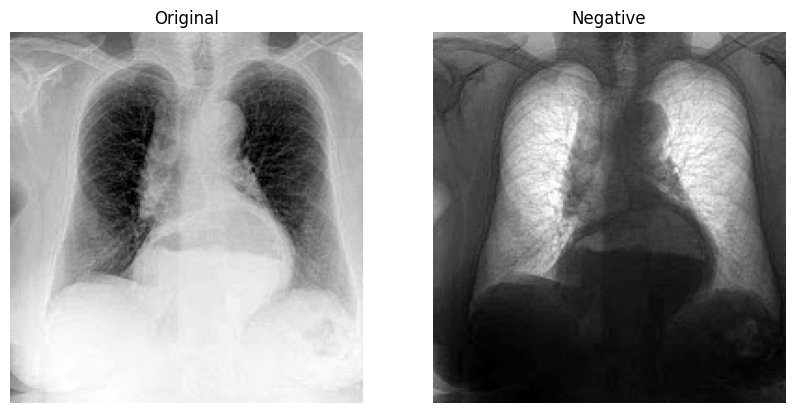

In [81]:
i1 = io.imread('/content/drive/MyDrive/PENGOLAHAN CITRA DIGITAL/rontgen.jpg') # Add Asssets with load in folder your drive
i2 = 255-i1
plt.figure(figsize=(10, 10), dpi=100) # Display large size img
plt.subplot(1,2,1); plt.imshow(i1)
plt.title('Original'); plt.axis("off")
plt.subplot(1,2,2); plt.imshow(i2)
plt.title('Negative'); plt.axis("off")
plt.show()

## b. Log Transformation

> Menggunakan fungsi transformasi
s = c · log(1 + r) , dimana c
adalah konstanta,
dan r adalah citra yang akan ditransformasi. Transformasi Log memetakan suatu
citra dengan range warna sempit menjadi lebih lebar pada citra outputnya.
Tujuannya untuk ekspansi nilai pixel gelap dan kompresi nilai pixel terang.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


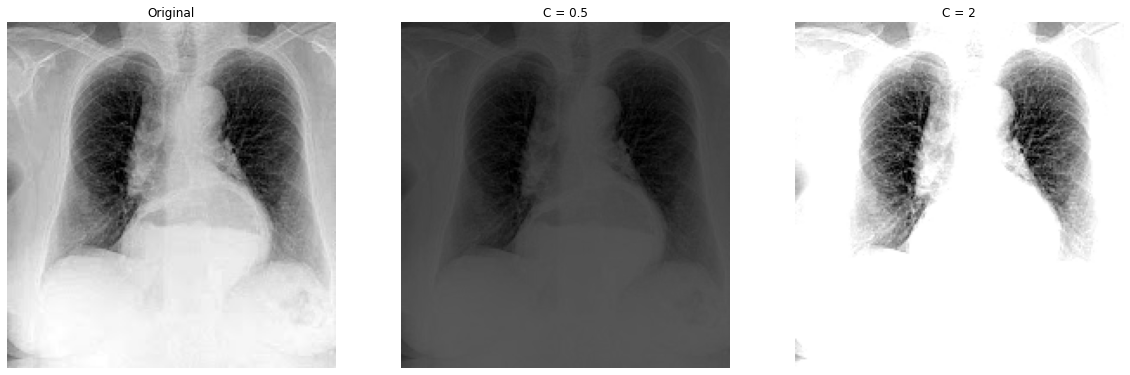

In [83]:
a = i1/255
c1 = 0.5
c2 = 2
f1 = c1*np.log(1 + (a))
f2 = c2*np.log(1 + (a))

plt.figure(figsize=(20, 15)) # Display large size img
plt.subplot(1,3,1); plt.imshow(i1)
plt.title('Original'); plt.axis("off")
plt.subplot(1,3,2); plt.imshow(f1)
plt.title('C = 0.5'); plt.axis("off")
plt.subplot(1,3,3); plt.imshow(f2)
plt.title('C = 2'); plt.axis("off")
plt.show()

## C. Gamma (Power) Transformation

> Gamma transformation hampir sama dengan log transformation. Bentuk umumnya
s = crp
untuk input r dan output s , c dan p adalah konstan.



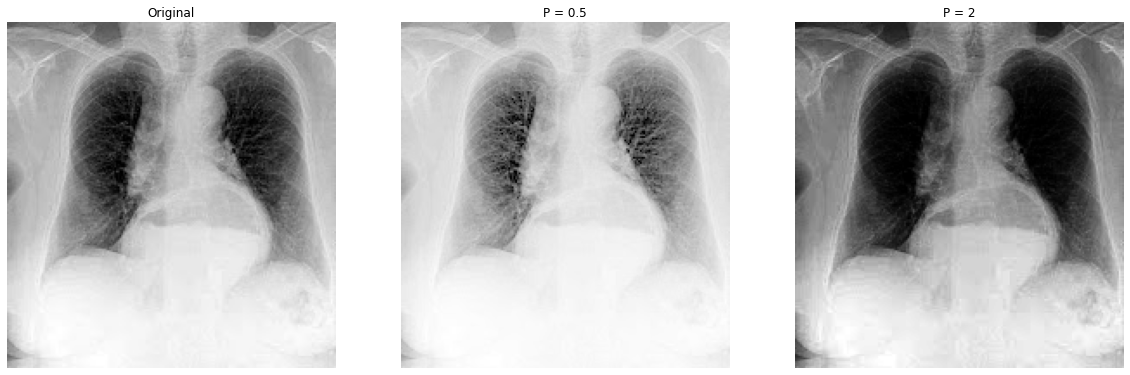

In [84]:
a = i1/255
c = 1
p1 = 0.5
p2 = 2
f1 = c*(a**p1)
f2 = c*(a**p2)

plt.figure(figsize=(20, 15)) # Display large size img
plt.subplot(1,3,1); plt.imshow(i1)
plt.title('Original'); plt.axis("off")
plt.subplot(1,3,2); plt.imshow(f1)
plt.title('P = 0.5'); plt.axis("off")
plt.subplot(1,3,3); plt.imshow(f2)
plt.title('P = 2'); plt.axis("off")
plt.show()

## D. Contrast Stretching

> Contrast stretching mengembangkan range level intensitas pixel yang tadinya
terbatas sehingga memiliki range intensitas penuh. Contoh fungsi yang dapat
digunakan adalah citra masukan yang gray level-nya tidak penuh dari 0 –255 (low
contrast) diubah menjadi citra yang gray level nya berkisar penuh dari 0 –255 (high contrast).

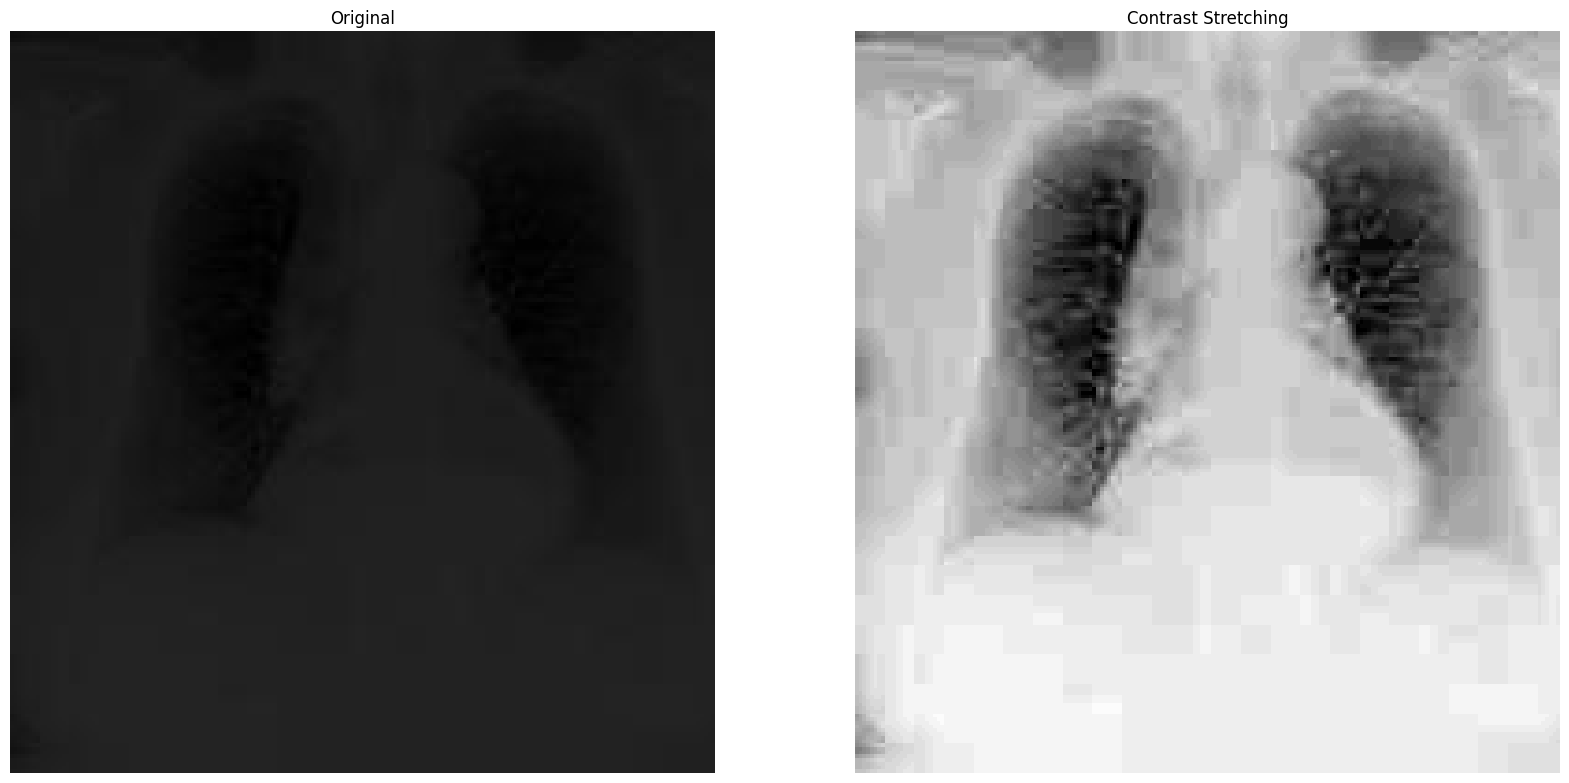

In [85]:
i3 = io.imread('/content/drive/MyDrive/PENGOLAHAN CITRA DIGITAL/rontgengelap.jpg')
mn = min(i3.flatten())
mx = max(i3.flatten())
b = int(np.floor(255 / (mx - mn)))
i3_cs = (i3 - mn) * b

plt.figure(figsize=(20, 15), dpi=100) # Display large size img
plt.subplot(1,2,1); plt.imshow(i3)
plt.title('Original'); plt.axis("off")
plt.subplot(1,2,2); plt.imshow(i3_cs)
plt.title('Contrast Stretching'); plt.axis("off")
plt.show()

## E. Image Histograms

> Histogram merupakan suatu teknik domain spasial yang mampu memberikan
deskripsi global pada tampilan citra. plt.hist(var) digunakan untuk menghitung
histogram pada citra grayscale.



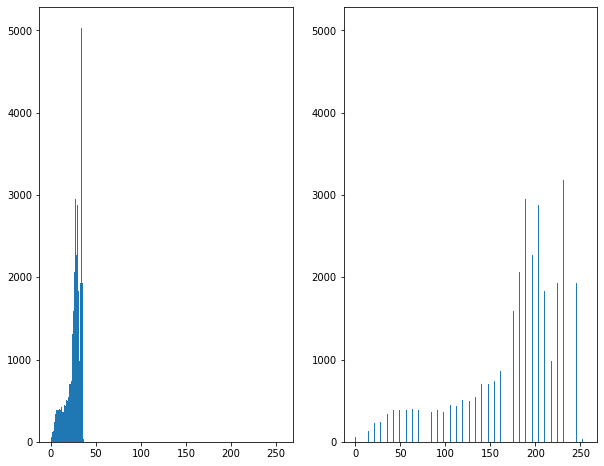

In [86]:
from skimage import util
gray = util.img_as_ubyte(color.rgb2gray(i3))
plt.figure(figsize=(10, 8))
plt.subplot(1,2,1); plt.hist(gray.flatten(), 256, range=(0,256))
gray2 = util.img_as_ubyte(color.rgb2gray(i3_cs))
plt.subplot(1,2,2); plt.hist(gray2.flatten(), 256, range=(0,256))
plt.show()

## F. Histogram Equalization

> Mengubah pemetaan gray level agar sebarannya (kontrasnya) lebih menyebar pada
kisaran 0-255. Histogram processing digunakan untuk mengubah bentuk histogram
agar pemetaan gray level pada citra juga berubah. Pada scikit-image, kita bisa
menggunakan method equalize_hist(img) pada library exposure.



In [70]:
from skimage import exposure
eq_i3 = exposure.equalize_hist(i3)

/usr/local/lib/python3.7/dist-packages/skimage/exposure/exposure.py:181: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  hist, bin_centers = histogram(image, nbins)


## G. Image Subtraction

> Dilakukan jika kita ingin mengambil bagian tertentu saja dari citra.



In [68]:
i4 = io.imread('/content/drive/MyDrive/PENGOLAHAN CITRA DIGITAL/flower.jpg')
i5 = io.imread('/content/drive/MyDrive/PENGOLAHAN CITRA DIGITAL/flower.jpg')
i_subs = np.subtract(i1, i2, dtype='int16')

# **2. Mask Processing**

> Mask Processing sering juga disebut dengan Image Filtering yaitu melakukan
operasi terhadap suatu jendela ketetanggaan pada citra. Filter pada dasarnya adalah
sebuah metode untuk meredam atau menghilangkan noise pada citra digital. Jenis
filter bermacam-macam dan fungsi serta efeknya juga berbeda-beda pula.

**1.   Smoothing Filter**

> Smoothing bertujuan untuk menekan gangguan (noise) pada citra. Gangguan
pada citra umumnya berupa variasi intensitas suatu piksel yang tidak berkorelasi
dengan piksel-piksel tetangganya.

## **Linear Filter**

> Filter spasial linear adalah filter yang bekerja dengan cara korelasi atau konvolusi
yang terdiri dari perkalian setiap pixel di lingkungan dengan koefisien yang
sesuai dan menjumlahkan hasil untuk mendapatkan respon pada setiap titik
(x, y) . Mekanisme dari spasial filtering hanya terdiri dari memindahkan filter
mask dari titik satu ke titik lainnya pada suatu citra. Berikut beberapa macam
filter linear yang dibahas pada Lab ini:

## A. Average Filter


> Average filter bekerja dengan cara mengganti nilai suatu piksel pada citra asaldengan nilai rata-rata dari piksel tersebut dan lingkungan tetangganya.




/usr/local/lib/python3.7/dist-packages/skimage/filters/rank/generic.py:119: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  out_dtype)


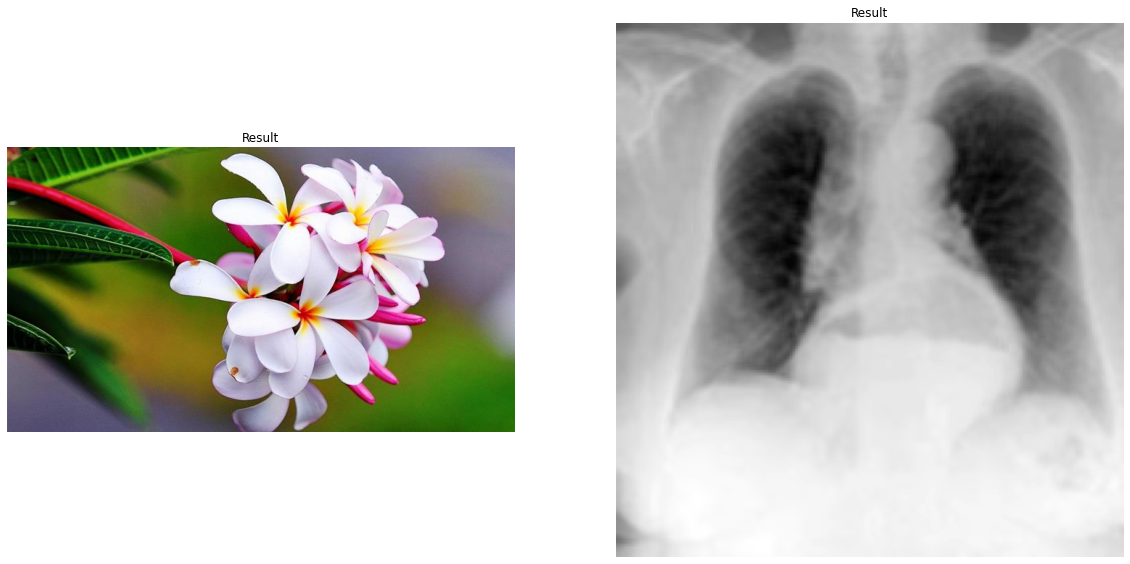

In [80]:
from skimage import filters, morphology
gray = color.rgb2gray(io.imread('/content/drive/MyDrive/PENGOLAHAN CITRA DIGITAL/rontgen.jpg'))
fi = filters.rank.mean(gray,selem=morphology.square(3))
plt.figure(figsize=(20, 10))
plt.subplot(1,2,1);plt.imshow(i1,cmap='gray',vmin=0,vmax=255)
plt.title('Result'); plt.axis("off")
plt.subplot(1,2,2);plt.imshow(fi,cmap='gray',vmin=0,vmax=255)
plt.title('Result'); plt.axis("off")
plt.show()

## Gaussian Filter

In [89]:
fi = util.img_as_ubyte(filters.gaussian(gray, sigma=1))

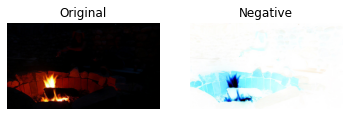

In [40]:
from skimage import color, io
from skimage.transform import rescale
import matplotlib.pyplot as plt
# import numpy as np

i1 = io.imread('/content/drive/MyDrive/PENGOLAHAN CITRA DIGITAL/rontgen.jpg')
i2 = 255-i1
plt.subplot(1,2,1); plt.imshow(i1)
plt.title('Original'); plt.axis("off")
plt.subplot(1,2,2); plt.imshow(i2)
plt.title('Negative'); plt.axis("off")
plt.show()

## **Assignment 1**

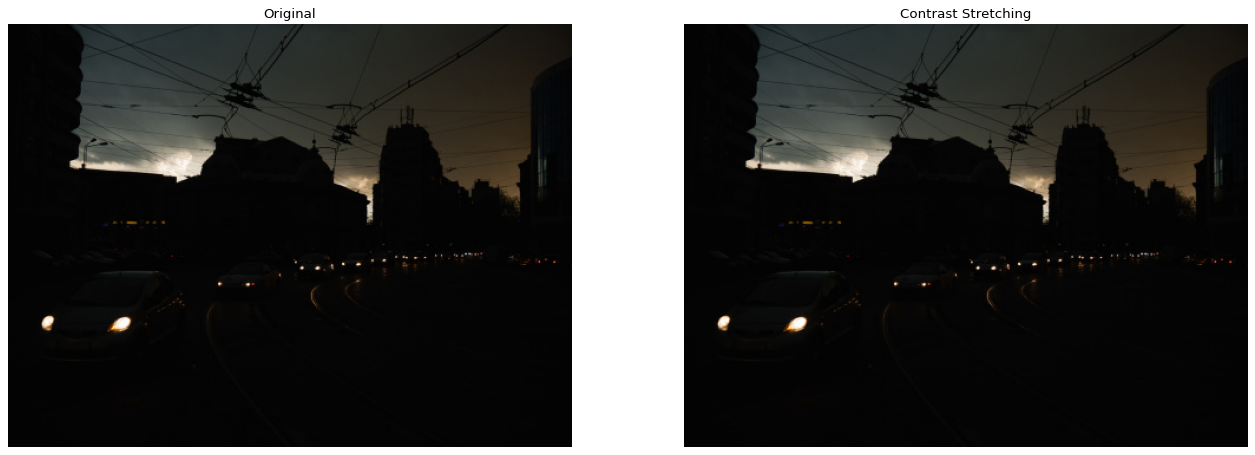

In [30]:
# Contrast Stretching
i3 = io.imread('/content/drive/MyDrive/PENGOLAHAN CITRA DIGITAL/gelap1.jpg')
mn = min(i3.flatten())
mx = max(i3.flatten())
b = int(np.floor(255 / (mx - mn)))
i3_cs = (i3 - mn) * b
plt.figure(figsize=(20, 15), dpi=80) # Menampilkan img large size
plt.subplot(1,2,1); plt.imshow(i3)
plt.title('Original'); plt.axis("off")
plt.subplot(1,2,2); plt.imshow(i3_cs)
plt.title('Contrast Stretching'); plt.axis("off")
plt.show()

In [ ]:
# Contrast Stretching
i3 = io.imread('/content/drive/MyDrive/PENGOLAHAN CITRA DIGITAL/gelap1.jpg')
mn = min(i3.flatten())
mx = max(i3.flatten())
b = int(np.floor(255 / (mx - mn)))
i3_cs = (i3 - mn) * b
plt.figure(figsize=(20, 15), dpi=80) # Menampilkan img large size
plt.subplot(1,2,1); plt.imshow(i3)
plt.title('Original'); plt.axis("off")
plt.subplot(1,2,2); plt.imshow(i3_cs)
plt.title('Contrast Stretching'); plt.axis("off")
plt.show()

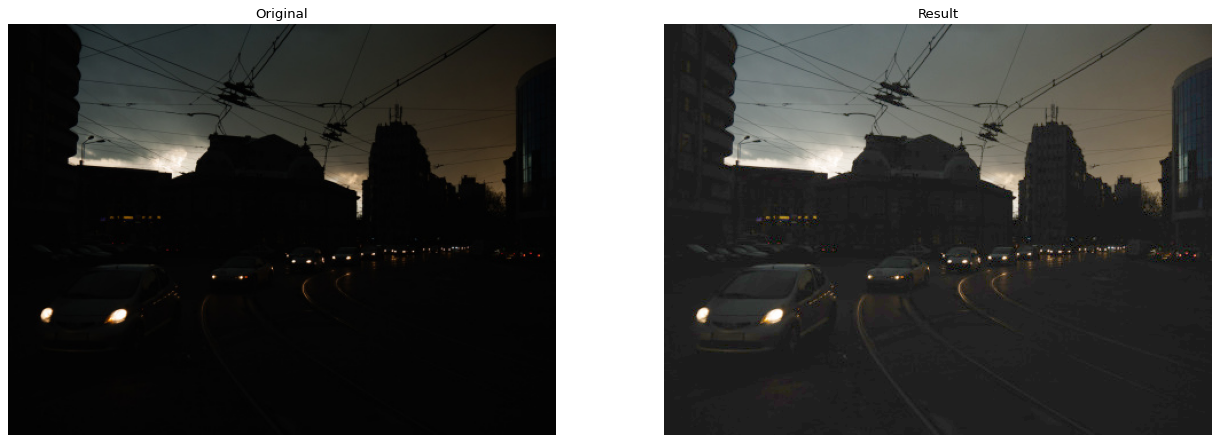

In [35]:
# Gamma (Power) Transformation 
a = i3/255
c = 1
p1 = 0.5
p2 = 2
f1 = c*(a**p1)

plt.figure(figsize=(30, 25), dpi=80)
plt.subplot(1,3,1); plt.imshow(i3)
plt.title('Original'); plt.axis("off")
plt.subplot(1,3,2); plt.imshow(f1)
plt.title('Result'); plt.axis("off")
plt.show()

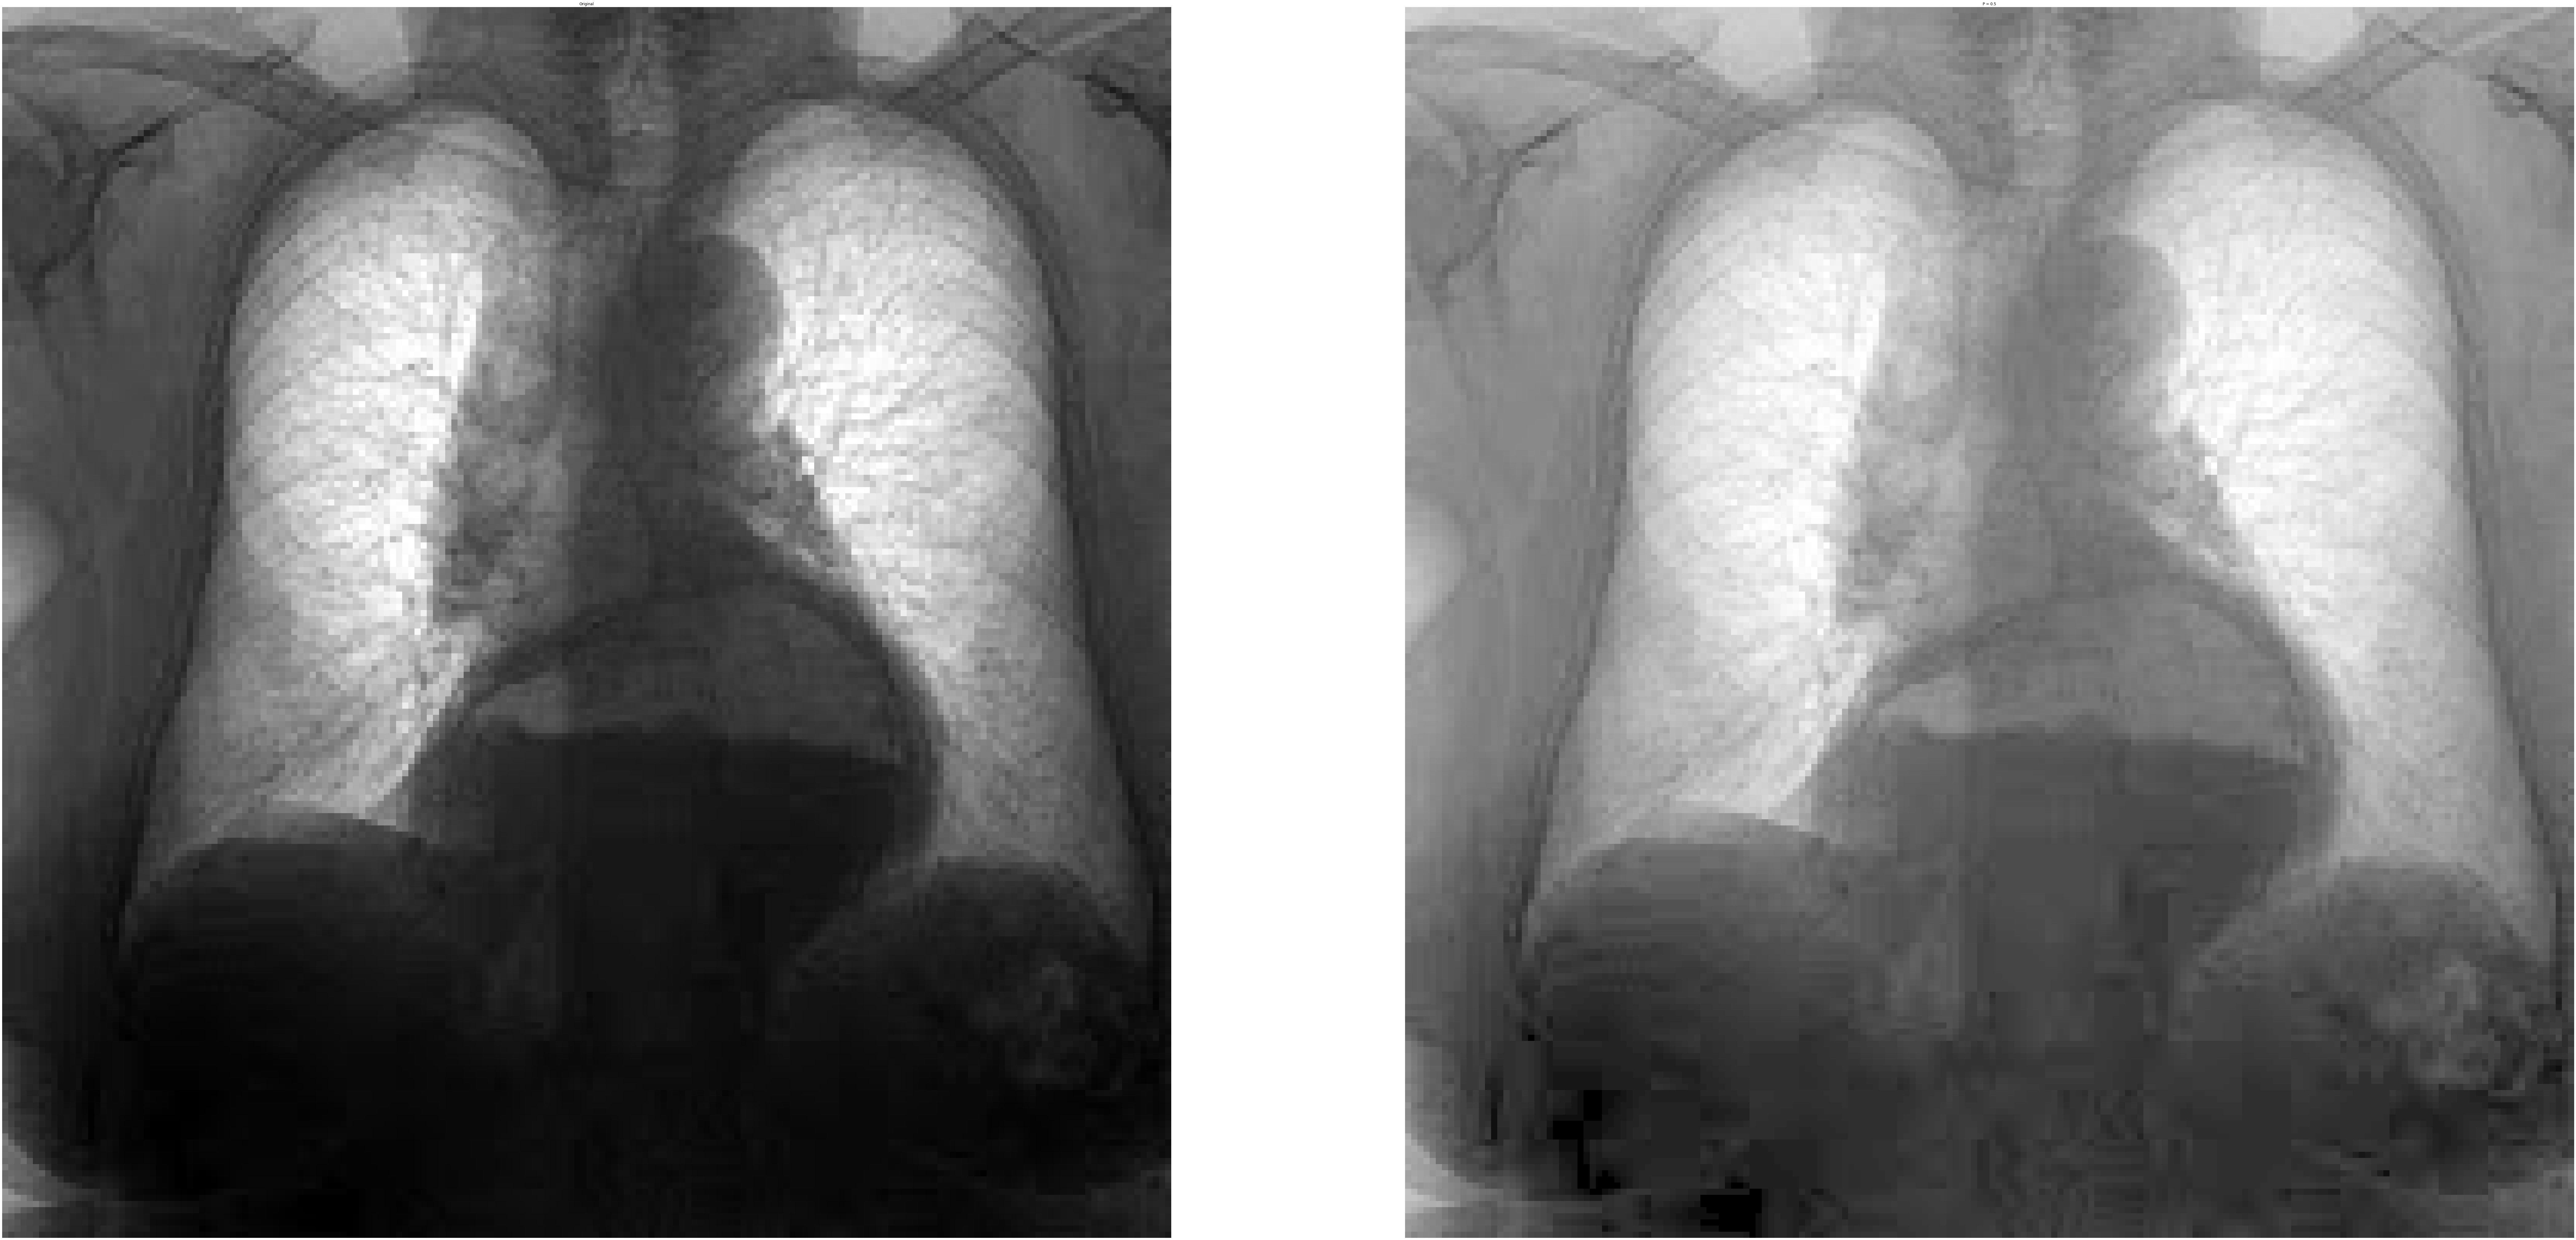

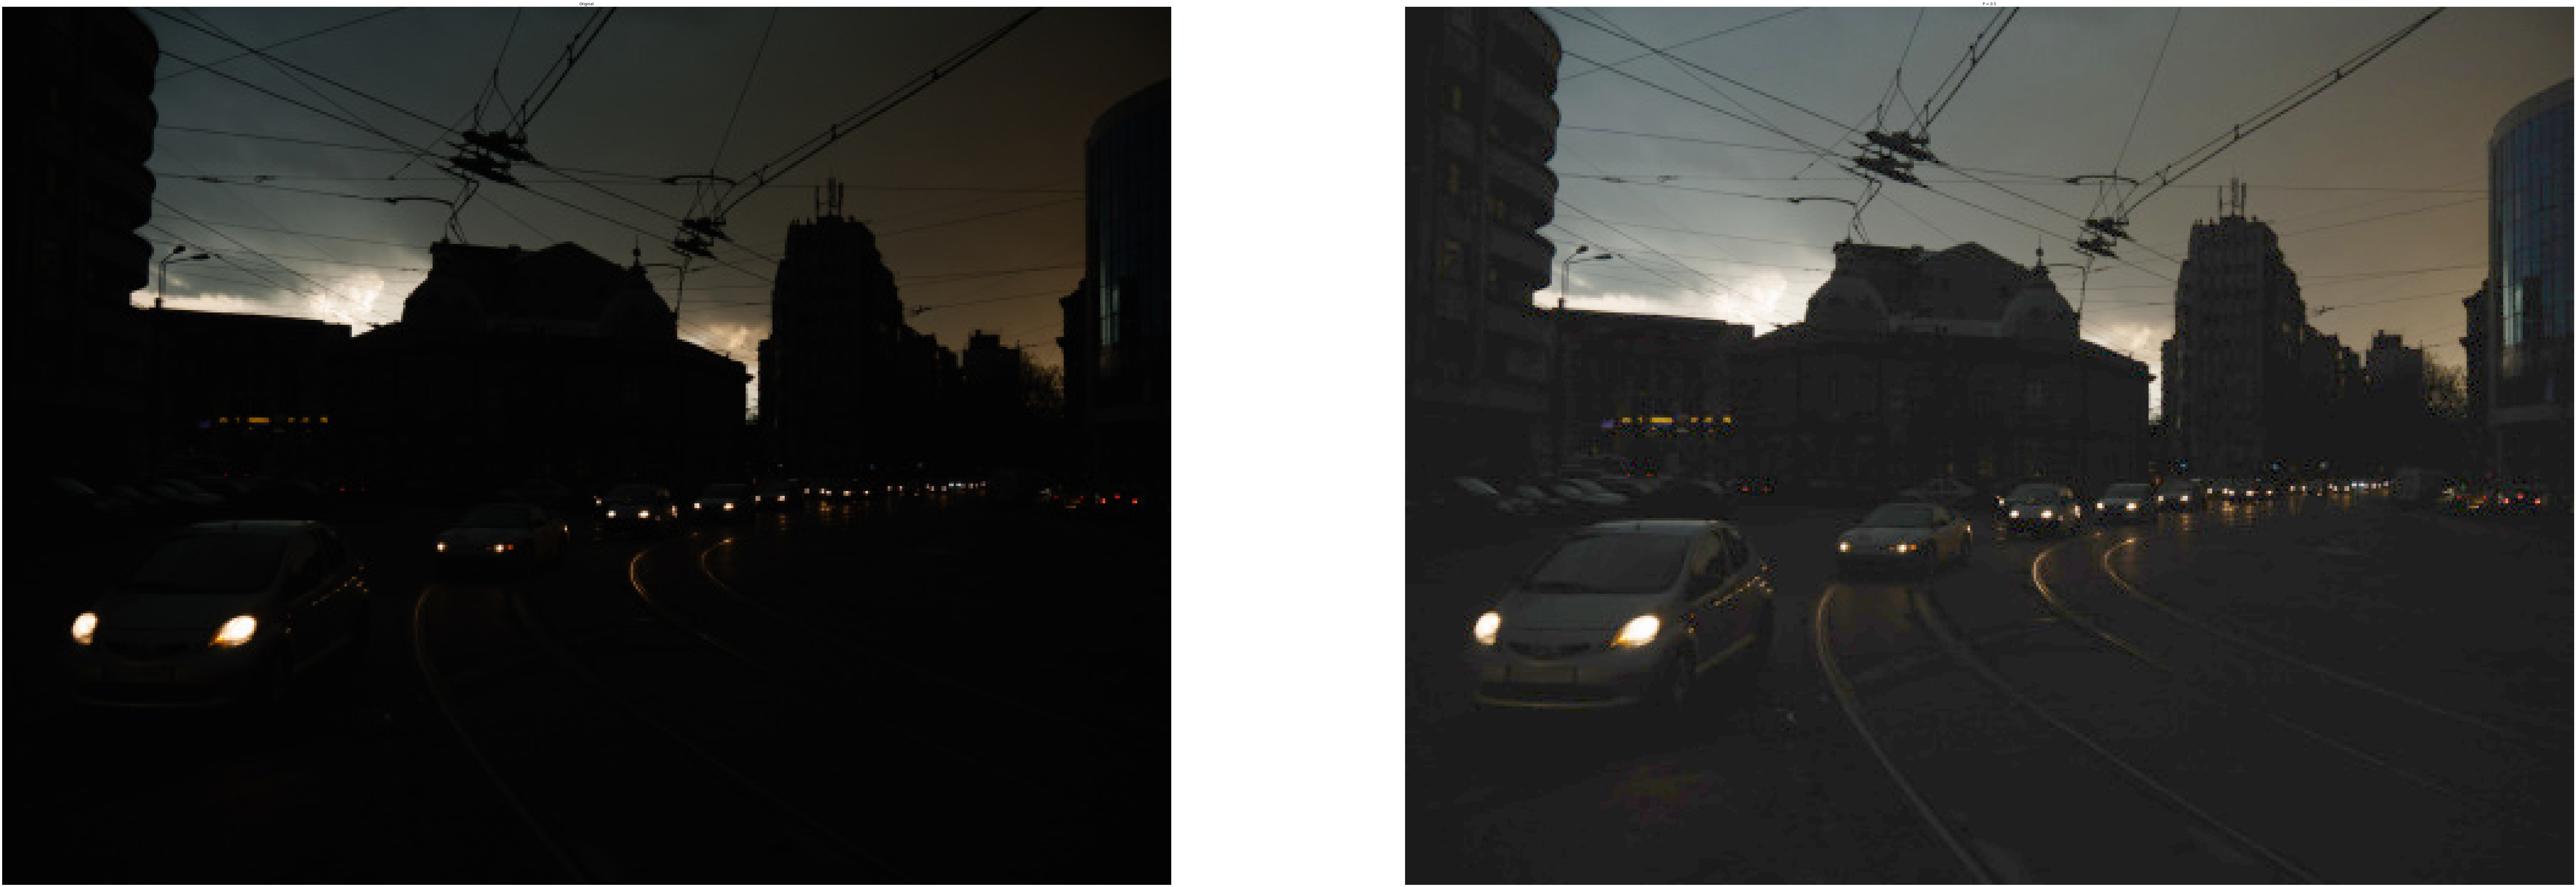

In [38]:
a = i1/255
c = 1
p1 = 0.5
p2 = 2
f1 = c*(a**p1)
f2 = c*(a**p2)

plt.figure(figsize=(150,100)) # Display large size img
plt.subplot(1,2,1); plt.imshow(i1)
plt.title('Original'); plt.axis("off")
plt.subplot(1,2,2); plt.imshow(f1)
plt.title('P = 0.5'); plt.axis("off")

# Gamma (Power) Transformation 
a = i3/255
c = 1
p1 = 0.5
p2 = 2
f1 = c*(a**p1)
f2 = c*(a**p2)

plt.figure(figsize=(150,100)) # Display large size img
plt.subplot(1,2,1); plt.imshow(i3)
plt.title('Original'); plt.axis("off")
plt.subplot(1,2,2); plt.imshow(f1)
plt.title('P = 0.5'); plt.axis("off")

plt.show()